<a href="https://colab.research.google.com/github/NithyaConnect/ds-phython/blob/main/states_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in the data and perform basic exploratory analysis

In [ ]:
path="/content/drive/MyDrive/State_wise_Health_income.csv" 
df_test=pd.read_csv(path)
df=df_test.copy()

In [ ]:
#Missing Value Analysis
df.isnull().sum()

Unnamed: 0           0
States               0
Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'States', 'Health_indeces1', 'Health_indices2',
       'Per_capita_income', 'GDP'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         297 non-null    int64 
 1   States             297 non-null    object
 2   Health_indeces1    297 non-null    int64 
 3   Health_indices2    297 non-null    int64 
 4   Per_capita_income  297 non-null    int64 
 5   GDP                297 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


So, there are no missing values.

Let us perform some analysis of the data distribution.

In [ ]:
df.drop(["Unnamed: 0"], axis=1,inplace=True) 



In [ ]:
#checking nan values
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())
df=df.dropna()


,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP


NAN values also 0

In [ ]:
# Check number of duplicates
n_duplicates = df.duplicated().sum()
print(f"seem to have {n_duplicates} duplicates in database.")


seem to have 0 duplicates in database.


#Treating bad values :

In [ ]:
df.loc[df['Health_indeces1'] == -10]


,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
35,35,Krastiltsi,-10,18,516,643


As 'Health_indeces1' have outliers we replace the value of median


In [ ]:
df.loc[df['Health_indeces1'] == -10]=df['Health_indeces1'].median()
df['Health_indeces1'].value_counts()

62.0      4
6430.0    2
119.0     2
3276.0    2
2499.0    2
         ..
568.0     1
592.0     1
229.0     1
3471.0    1
3463.0    1
Name: Health_indeces1, Length: 278, dtype: int64

In [ ]:
df

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22
...,...,...,...,...,...,...
292,292,Greencastle,3443,970,2499,238636
293,293,Greenisland,2963,793,1257,162831
294,294,Greyabbey,3276,609,1522,120184
295,295,Greysteel,3463,847,934,199403


#dropping categorical column "States"

In [ ]:
df.drop(["States"], axis=1,inplace=True) 

Univariate analysis :

Health_indeces1
Skew : 0.72


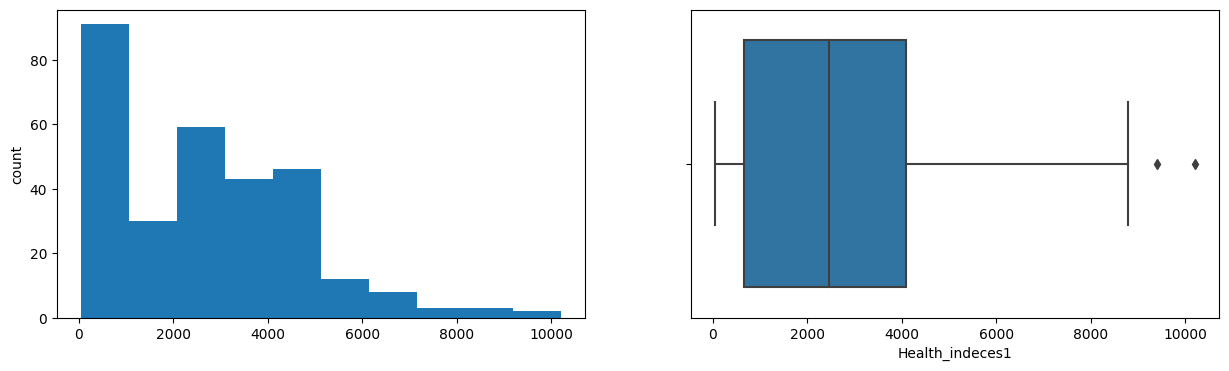

Health_indices2
Skew : 0.02


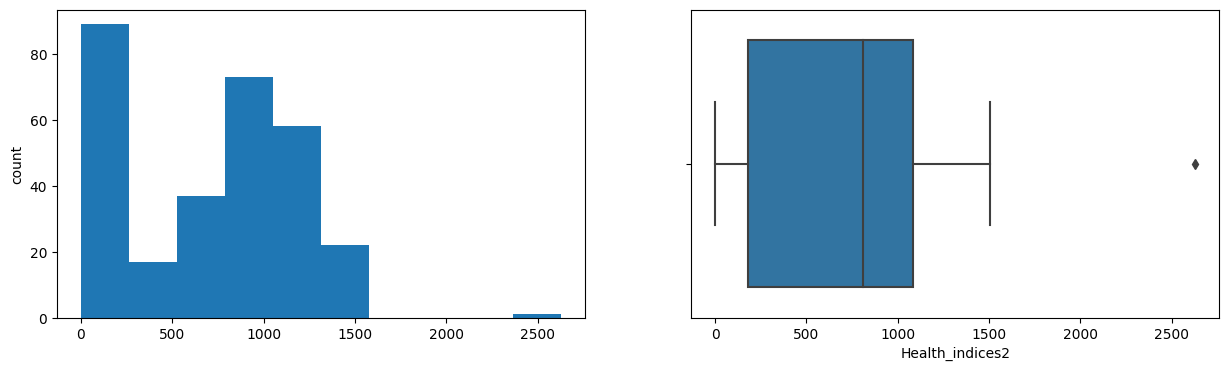

Per_capita_income
Skew : 0.82


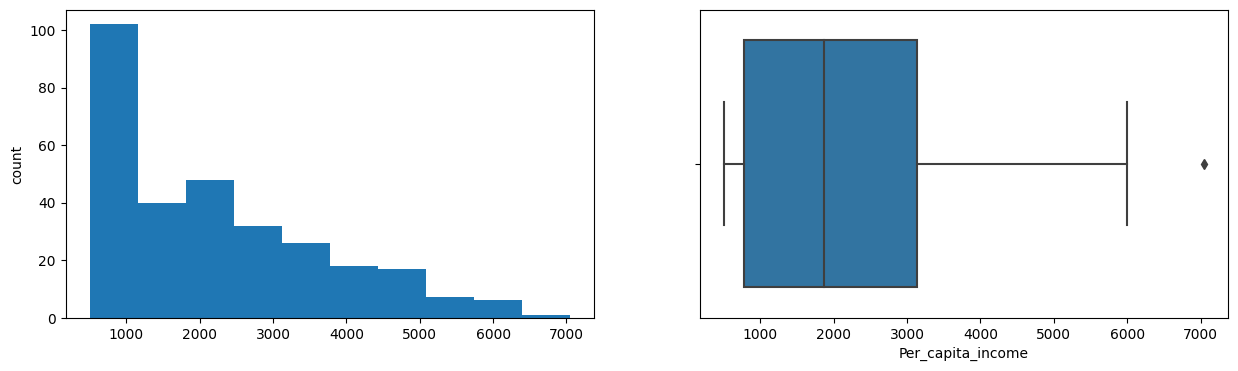

GDP
Skew : 0.83


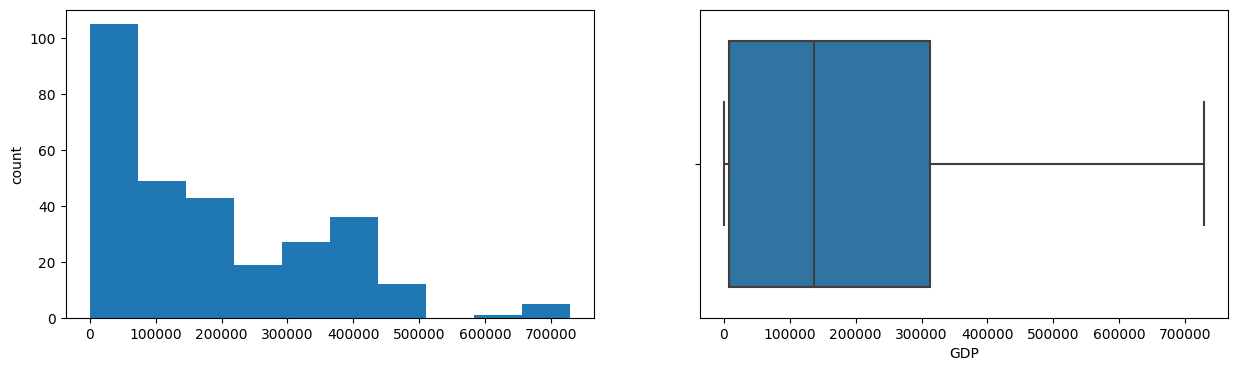

In [ ]:
for col in df.columns[1:]:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

Observations:

As observed earlier, most of the variables have skewed distributions
The distribution for Health_indices2 is relatively less skewed with fewer  outliers
The distribution for all other variables is highly skewed to the right. All these variables have some outliers to the right end.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Health_indeces1    297 non-null    int64
 1   Health_indices2    297 non-null    int64
 2   Per_capita_income  297 non-null    int64
 3   GDP                297 non-null    int64
dtypes: int64(4)
memory usage: 9.4 KB


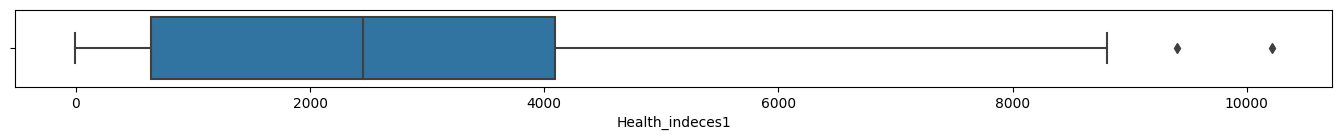

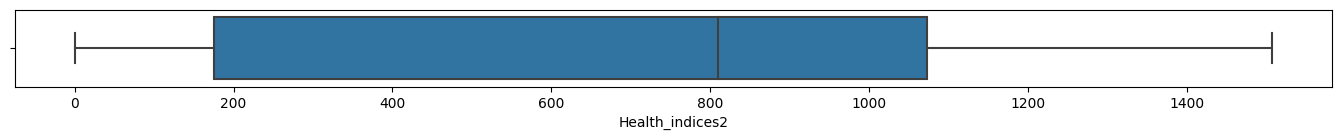

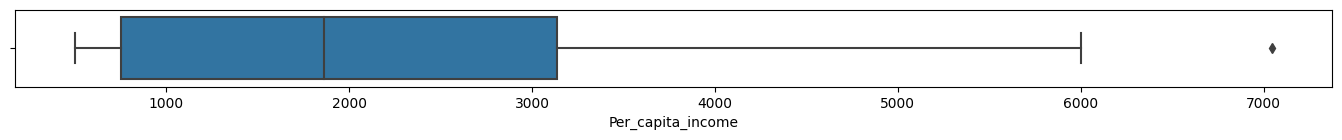

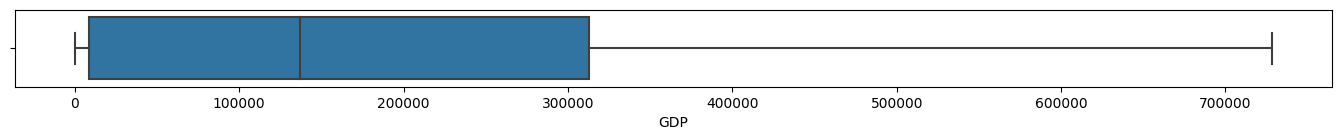

In [ ]:
#box plot of all columns
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

In [ ]:
#treating outliers:
def impute_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [ ]:
#capping outliers:

for column in df:     
  lr,ur=impute_outlier(df[column])
  df[column]=np.where(df[column]>ur,ur,df[column])
  df[column]=np.where(df[column]<lr,lr,df[column])

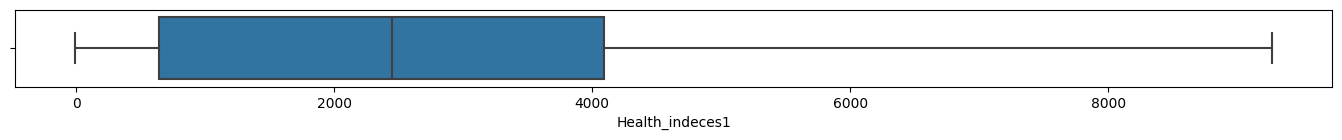

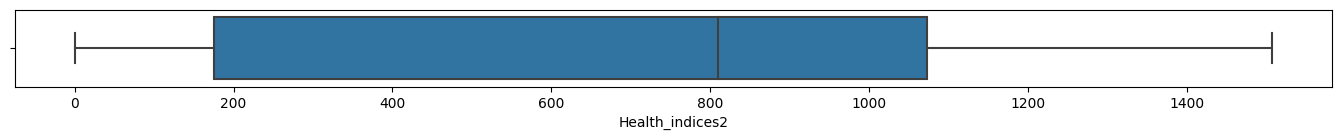

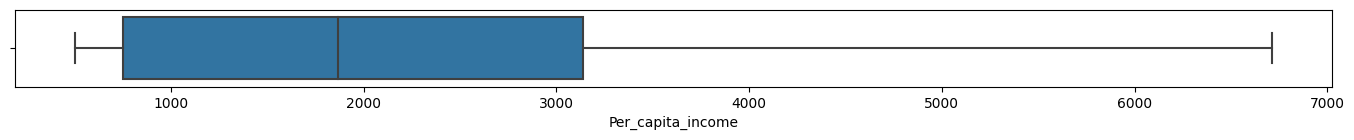

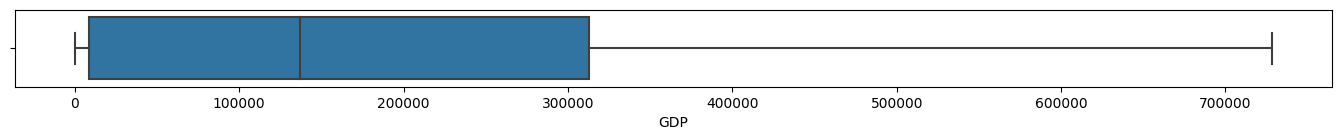

In [ ]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

# **Bivariate Analysis:**

###Now, let's begin Bi-variate Analysis. Here, we analyse 2 variables trying to find any relation between them

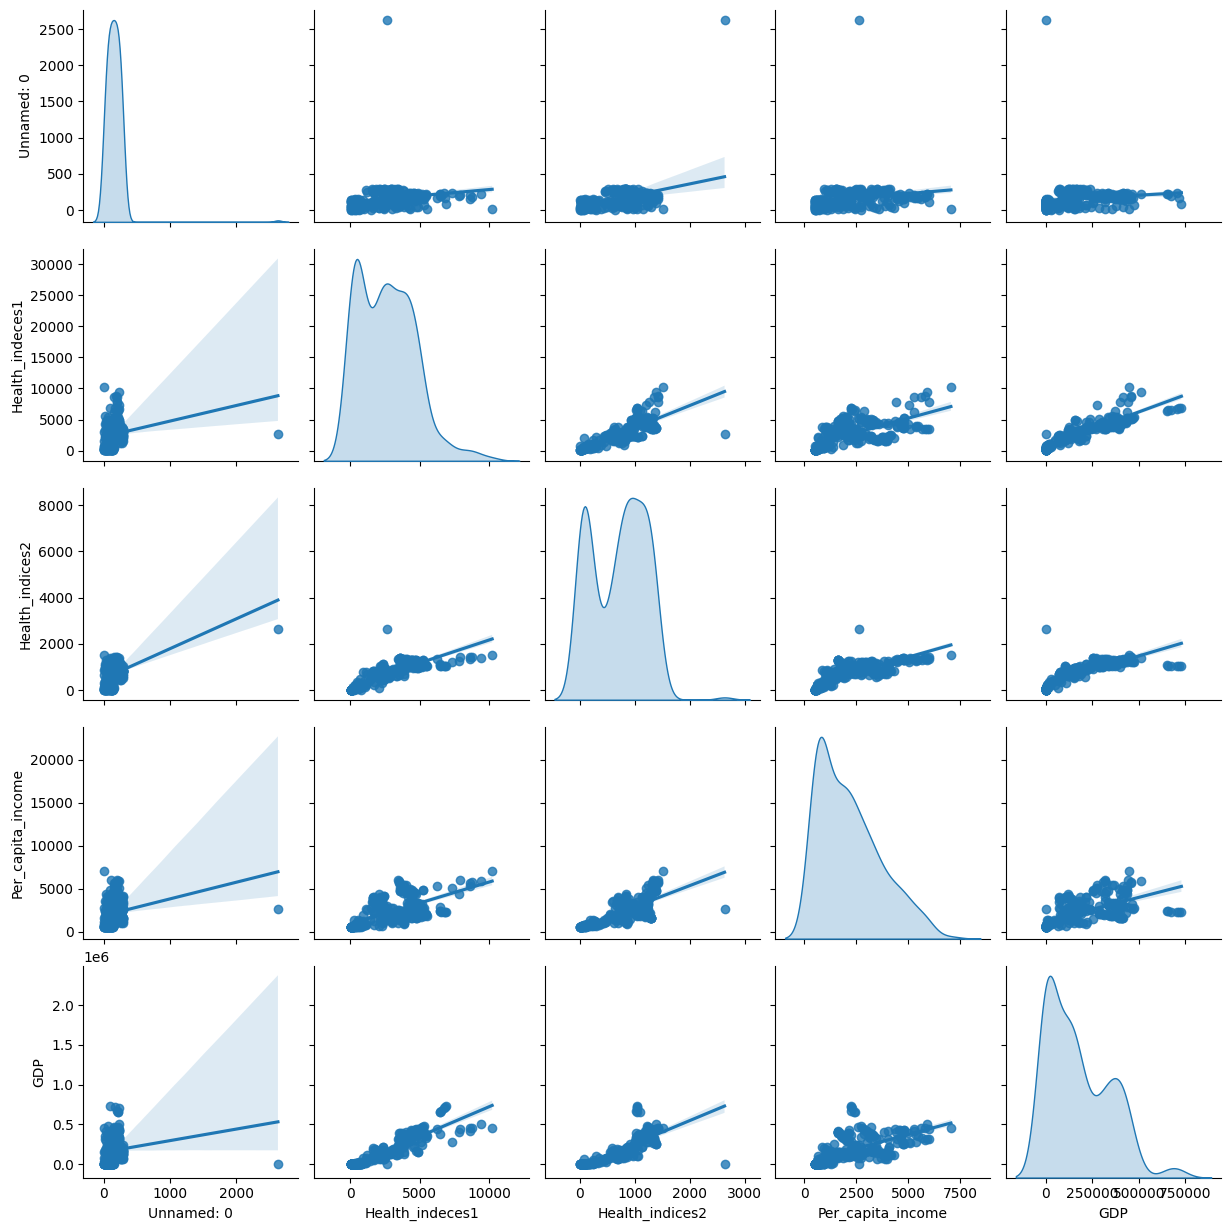

In [ ]:
sns.pairplot(data = df, kind='reg', diag_kind = 'kde')

Although we can say that there exists some relationship between variables, we can't tell quantify that from the above graphs.
So, let's quantify the amounts of correlation using Pearson Correlation and verify the above observations

<Axes: >

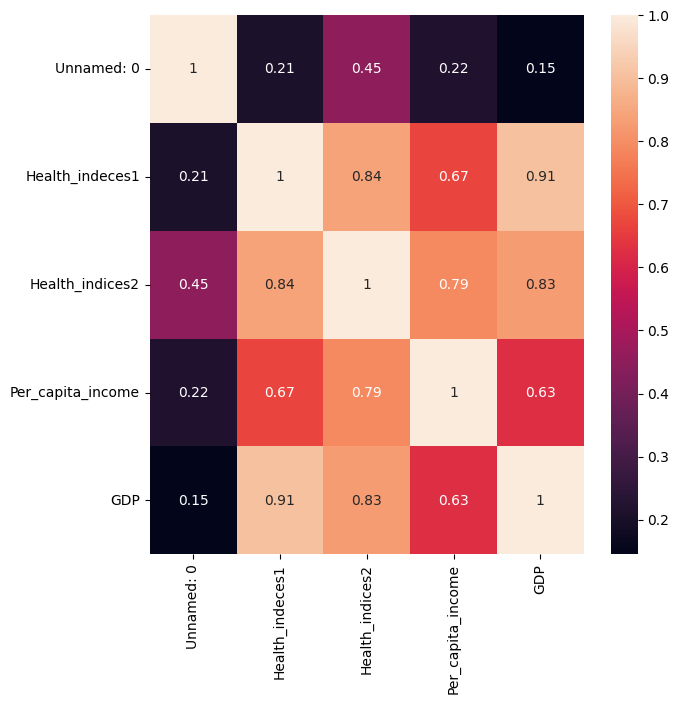

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

bservations:

There is a strong positive correlation between Health indices 1,Health indices 2 with Grp. This makes sense.
The per_capiata income have positive relationship with gdpp. This indicates that people live healthier in economocally settled stetes.


In [ ]:
df.drop(["GDP"], axis=1,inplace=True) 

Scaling the data
Clustering algorithms are distance based algorithms and all distance based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering algorithms.
We will drop the variables 'States' and "GDP" before scaling the data as we would not use these two variables for clustering the States.

In [ ]:
#scaling
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
df_scaled.describe()
X=df_scaled
Y=df_scaled


In [ ]:
#before sclaing
df.describe()

,Unnamed: 0,Health_indeces1,Health_indices2,Per_capita_income
count,297.000000,297.000000,297.000000,297.000000
mean,156.737884,2639.040914,702.428120,2164.034180
std,167.541635,2032.701763,480.581211,1489.039168
min,0.000000,43.000000,0.000000,500.000000
25%,75.000000,654.000000,179.000000,773.000000
50%,149.000000,2458.000000,811.000000,1873.000000
75%,223.000000,4094.000000,1085.000000,3137.000000
max,2630.151515,10219.000000,2630.151515,7049.000000


In [ ]:
#aftter scaling

df_scaled.describe()

,Unnamed: 0,Health_indeces1,Health_indices2,Per_capita_income
count,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02
mean,-1.196200e-16,4.784800e-17,-4.784800e-17,4.784800e-17
std,1.001688e+00,1.001688e+00,1.001688e+00,1.001688e+00
min,-9.370950e-01,-1.279294e+00,-1.464089e+00,-1.119408e+00
25%,-4.886895e-01,-9.782011e-01,-1.090995e+00,-9.357591e-01
50%,-4.626279e-02,-8.921450e-02,2.262992e-01,-1.957809e-01
75%,3.961639e-01,7.169840e-01,7.974044e-01,6.545214e-01
max,1.478790e+01,3.735301e+00,4.018003e+00,3.286153e+00


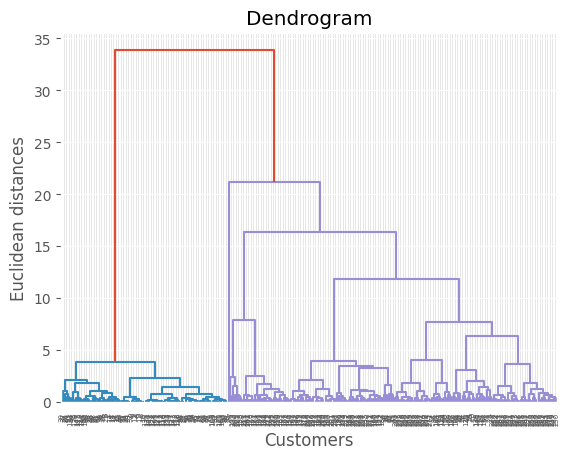

In [ ]:
 #Using the dendrogram to find the optimal numbers of clusters. 

import scipy.cluster.hierarchy as sch

#Lets create a dendrogram variable 
# linkage is actually the algorithm itself of hierarchical clustering and then in 
#linkage we have to specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

#selecting optimum number of clusters for kmeans


In [ ]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(Y)
    wss.append(KM.inertia_)
    labels = KM.predict(Y)
wss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[1187.9999999999998,
 608.3774577087902,
 384.40753484063134,
 252.7030286946752,
 184.96810894555517,
 151.7435798092949,
 121.1156418921747,
 100.79447220395252,
 91.5725749678266,
 81.58269925486866]

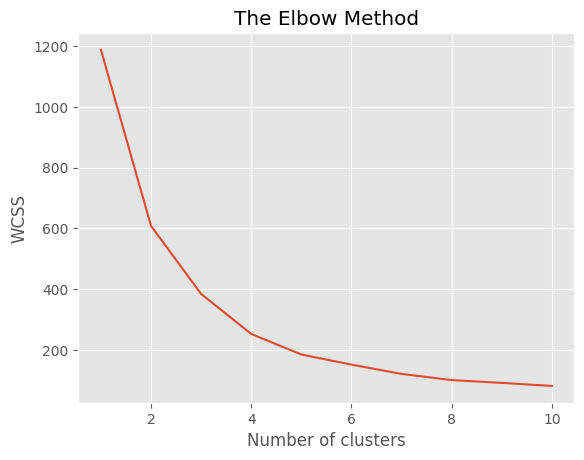

In [ ]:
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 
# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2,7):
    kmeans_s=KMeans(n_clusters=k, random_state=1).fit(Y)
    labels_s= kmeans_s.predict(Y)
    sc[k] = silhouette_score(Y, labels_s)
    print("sil s",sc[k] )

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


sil s 0.5151316441344495
sil s 0.5294065064665722
sil s 0.45874394536691865
sil s 0.47598100055038495
sil s 0.4838892852734146


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


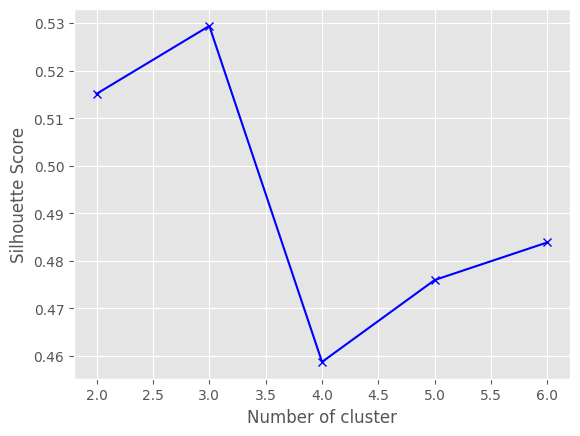

In [ ]:
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

bservations:

We can see from the plot that silhouette score is highest for k=3. Well that makes it slightly easy for us and we can start with first understanding these 3 clusters. So let's take the number of clusters as 3

In [ ]:
clust = KMeans(n_clusters = 3,random_state=1,max_iter=300,init='k-means++')
clust.fit_predict(Y)
labels=clust.labels_
df_test['KM_labels']=labels
df_test['KM_labels'].value_counts()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    189
0    107
2      1
Name: KM_labels, dtype: int64

Observations:

This looks like a very skewed clustering with a very few observations in one cluster and more than 100 in other. Let's check out the profiles of these clusters


In [ ]:
clust_profile=df_test
clust_summary=clust_profile.groupby('KM_labels').mean()
clust_summary



<ipython-input-34-25e9357fec3f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clust_summary=clust_profile.groupby('KM_labels').mean()


,Unnamed: 0,Health_indeces1,Health_indices2,Per_capita_income,GDP
KM_labels,,,,,
0,81.093458,611.785047,144.607477,745.635514,13738.570093
1,186.476190,3786.793651,1008.031746,2964.576720,266591.862434
2,35.000000,-10.000000,18.000000,516.000000,643.000000


In [ ]:
df.to_csv('clust_profile.csv')  

In [ ]:
clust_summary=clust_profile.groupby('KM_labels').describe().T
clust_summary


KM_labels                            0              1      2
Unnamed: 0        count     107.000000     189.000000    1.0
                  mean       81.093458     186.476190   35.0
                  std        52.619233      77.119179    NaN
                  min         0.000000       1.000000   35.0
                  25%        39.000000     152.000000   35.0
                  50%        81.000000     199.000000   35.0
                  75%       117.000000     247.000000   35.0
                  max       268.000000     296.000000   35.0
Health_indeces1   count     107.000000     189.000000    1.0
                  mean      611.785047    3786.793651  -10.0
                  std       643.015024    1615.230273    NaN
                  min        43.000000    1162.000000  -10.0
                  25%       173.000000    2530.000000  -10.0
                  50%       410.000000    3608.000000  -10.0
                  75%       739.500000    4572.000000  -10.0
                  max      2499.000000   10219.000000  -10.0
Health_indices2   count     107.000000     189.000000    1.0
                  mean      144.607477    1008.031746   18.0
                  std       153.612092     244.082867    NaN
                  min         0.000000     513.000000   18.0
                  25%        26.500000     820.000000   18.0
                  50%        86.000000    1016.000000   18.0
                  75%       217.000000    1230.000000   18.0
                  max       795.000000    1508.000000   18.0
Per_capita_income count     107.000000     189.000000    1.0
                  mean      745.635514    2964.576720  516.0
                  std       281.771398    1286.750431    NaN
                  min       500.000000     858.000000  516.0
                  25%       554.000000    1991.000000  516.0
                  50%       625.000000    2710.000000  516.0
                  75%       816.500000    3813.000000  516.0
                  max      1873.000000    7049.000000  516.0
GDP               count     107.000000     189.000000    1.0
                  mean    13738.570093  266591.862434  643.0
                  std     24082.543930  142392.835323    NaN
                  min        22.000000   69924.000000  643.0
                  25%       313.500000  148660.000000  643.0
                  50%      3444.000000  243546.000000  643.0
                  75%     10589.000000  375130.000000  643.0
                  max    109755.000000  728575.000000  643.0

In [ ]:
df_test.columns


In [ ]:
cols_visualise = []

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()